# PROJECT

##Import all relevant libraries here

In [28]:
#0. import all necessary libraries
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.cluster import hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  

## Import dataset


The dataset has been uploaded to Google drive and the link is


In [29]:
#1. import google drive into colab
#from google.colab import drive

#2. mount the drive
#drive.mount('/content/drive')

#3. read the dataset (in CSV format) into a python dataframe using pandas
#df = pd.read_csv('/content/drive/MyDrive/CSC311_2022/dataset/seeds_dataset.csv')

#4. preview the data
#df.head(10)

df = pd.read_csv('CSC311MLUSL_DATASET.csv')

df.head(10)


,Area,Perimeter,Compactness,Length,Width,Asymmetry,kernel_len,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


## Separate X and Y
## let Y be the label and X all other columns

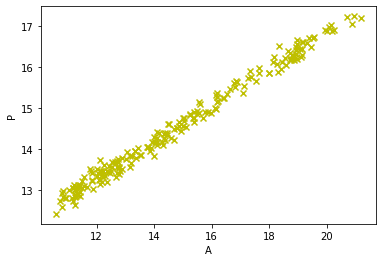

In [30]:
X = df.iloc[:,df.columns != 'class']
Y = df.iloc[:,df.columns == 'class']

X.head(10)


Y = Y.replace([1,2,3],[0,1,2])
Y.head(10)

#plot Area vs Perimeter 
area = df.loc[:,df.columns == 'Area']
perimeter = df.loc[:,df.columns == 'Perimeter']
plt.scatter(area,perimeter,marker = "x", c='y')
plt.xlabel("A")
plt.ylabel("P")
plt.show()

#scalling the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


## KMeans

C:\Users\27635\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

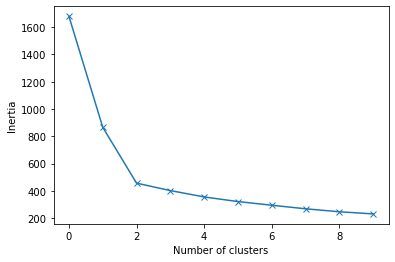

In [31]:
#scale your data
#plot an Elbow graph using 10 iterations

inertias=[]

for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++')
    km.fit(df_scaled)
    inertias.append(km.inertia_)
    
#plot Inertia vs number of clusters 
plt.plot(range(len(inertias)), inertias, marker = 'x')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


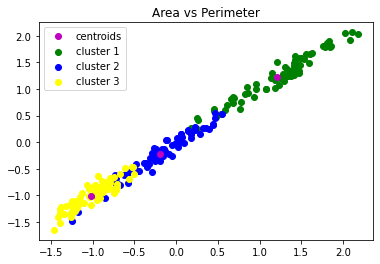

In [32]:
#cluster the dataset using k = 3
k=3
km = KMeans(n_clusters = k)
labels = km.fit_predict(df_scaled)
centroids = km.cluster_centers_

#plot the results of Area and Perimeter 

cluster1 = df_scaled[labels == 0]
cluster2 = df_scaled[labels == 1]
cluster3 = df_scaled[labels == 2]


plt.scatter(cluster1[:,0], cluster1[:,1], color ='green' , label = 'cluster 1')
plt.scatter(cluster2[:,0], cluster2[:,1], color = 'blue', label = 'cluster 2')
plt.scatter(cluster3[:,0], cluster3[:,1], color = 'yellow', label = 'cluster 3')
plt.plot(centroids[:,0], centroids[:,1], 'mo',  label = 'centroids')
plt.title('Area vs Perimeter')
plt.legend()

#show the 3 clusters and their centroids
plt.show()


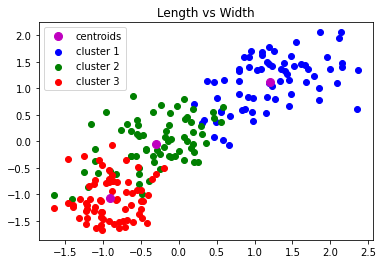

In [33]:
#plot the results of Length and Width 
centroids = km.cluster_centers_
plt.scatter(cluster1[:,3], cluster1[:,4], color =  'blue', label = 'cluster 1',)
plt.scatter(cluster2[:,3], cluster2[:,4], color =  'green', label = 'cluster 2')
plt.scatter(cluster3[:,3], cluster3[:,4], color =  'red', label = 'cluster 3')
plt.plot(centroids[:,3], centroids[:,4], 'mo', markersize=8, label = 'centroids')
plt.title('Length vs Width')
plt.legend()

#show the 3 clusters and their centroids
plt.show()

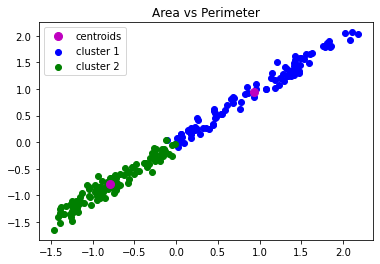

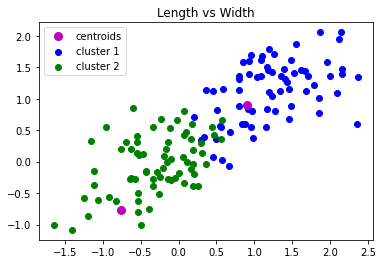

In [34]:
#Now lets cluster the dataset using the number of k you select from the Elbow method above
km2 = KMeans(n_clusters = 2) # I have selected k as 2
labels_2 = km2.fit_predict(df_scaled)
centroids_2 = km2.cluster_centers_

#plot the results of Area and Perimeter
cluster_1 = df_scaled[labels_2 == 0]
cluster_2 = df_scaled[labels_2 == 1]


plt.scatter(cluster_1[:,0], cluster_1[:,1], color =  'blue', label = 'cluster 1')
plt.scatter(cluster_2[:,0], cluster_2[:,1], color =  'green', label = 'cluster 2')
plt.plot(centroids_2[:,0], centroids_2[:,1], 'mo', markersize=8, label = 'centroids')
plt.title('Area vs Perimeter')
plt.legend()
#show the 3 clusters and their centroids
plt.show()

##plot the results of Length and Width 

plt.scatter(cluster1[:,3], cluster1[:,4], color =  'blue', label = 'cluster 1')
plt.scatter(cluster2[:,3], cluster2[:,4], color =  'green', label = 'cluster 2')
plt.plot(centroids_2[:,3], centroids_2[:,4], 'mo', markersize=8, label = 'centroids')
plt.title('Length vs Width')
plt.legend()
#show the 3 clusters and their centroids
plt.show()

### Calculate Accuracies of KMeans

In [35]:
#compare accucies of both clustering i.e. k = 3 vs k = your choice

acscorek3 = accuracy_score(Y,labels)
acscorek3 *= 100
print("Accurary score(when K=3)",acscorek3)



acscorek2 = accuracy_score(Y,labels_2)
acscorek2 *=100
print("Accurary score(when K=2)",acscorek2)


Accurary score(when K=3) 35.23809523809524
Accurary score(when K=2) 12.380952380952381


## AHC

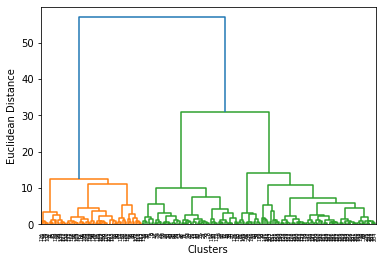

In [36]:
#Plot Dendrogram to determine the number of clusters
sch.dendrogram(sch.linkage(X,method="ward"))
plt.xlabel("Clusters")
plt.ylabel("Euclidean Distance")
plt.show()

In [37]:
#Perform AHC clustering with number of clusters found in the dendrogram 
ahc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y = ahc.fit_predict(X)
print(y)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 0 2 2 2 2 2 2
 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 2 2 0 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 2 1 2 2 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


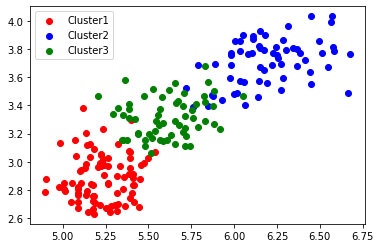

In [38]:
#plot scatter plots from B2, for Length and width, including cluster centroids
X_lw = X.iloc[:,3:5].values   # slicing X to get the column of length and width

plt.scatter(X_lw[y==0,0],X_lw[y==0,1],c = 'red',label = 'Cluster1')
plt.scatter(X_lw[y==1,0],X_lw[y==1,1],c = 'blue',label = 'Cluster2')
plt.scatter(X_lw[y==2,0],X_lw[y==2,1],c = 'green',label = 'Cluster3')
plt.legend()
plt.show()


In [39]:
#check accuracy
ahc_accscore = accuracy_score(Y,y)*100
print("Accuracy Score = ", ahc_accscore)

Accuracy Score =  37.61904761904762


## KNN

In [40]:
#cluster the dataset using KNN and k = 3

X3 =scaler.fit_transform(X)

# splitting the data into a train and test data set - 70-30
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y, test_size= 0.3, random_state=101,shuffle=True)
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,Y_train)

# Predicting the test set results.
y_predict = classifier.predict(X_test)
print(y_predict)

[1 1 2 1 2 2 2 1 1 0 2 2 1 2 2 0 1 2 0 1 2 0 2 0 2 0 0 2 2 2 0 0 2 0 0 2 2
 0 1 2 0 2 1 2 1 2 2 2 1 1 0 0 1 0 0 0 1 1 2 0 2 1 1]


C:\Users\27635\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


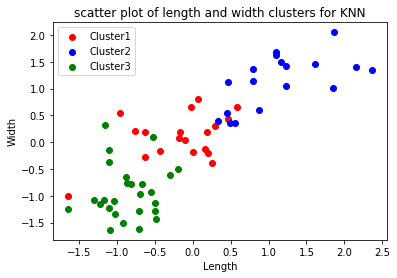

In [41]:
#Plot a scatter plot for "Length" and "Width" clusters
X_lw2 = X_test[:,3:5]   # slicing X to get the column of length and width

plt.scatter(X_lw2[results==0,0],X_lw2[results==0,1],c = 'red',label = 'Cluster1')
plt.scatter(X_lw2[results==1,0],X_lw2[results==1,1],c = 'blue',label = 'Cluster2')
plt.scatter(X_lw2[results==2,0],X_lw2[results==2,1],c = 'green',label = 'Cluster3')
plt.xlabel("Length")
plt.ylabel("Width")
plt.title('scatter plot of length and width clusters for KNN')
plt.legend()
plt.show()


In [42]:
#Results - compare prediction results with known values of Y
KNN_acscore = accuracy_score(Y_test,results)*100 
print("Accuracy Score = ", KNN_acscore)

Accuracy Score =  88.88888888888889


In [43]:
#draw a confusion matrix of KNN
confusion = confusion_matrix(Y_test,results)
print("Confusion Matrix\n\n",confusion )

Confusion Matrix

 [[19  3  4]
 [ 0 15  0]
 [ 0  0 22]]


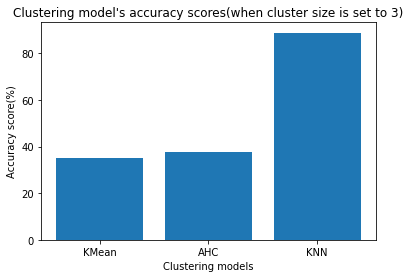

In [44]:
##Bar chart of accuracies when when cluster size is set to 3.
Bars = ['KMean','AHC','KNN']
accuracies=[acscorek3,ahc_accscore,KNN_acscore]
plt.bar(Bars,accuracies)
plt.title("Clustering model's accuracy scores(when cluster size is set to 3)")
plt.xlabel("Clustering models")
plt.ylabel("Accuracy score(%)")
plt.show()

